# Ejercicio N°2
Generar un dataset similar al de la pág. 12 de este apunte (dos conjuntos Gaussianos con diferente media y DS, N=50 c/u, uno con etiqueta A y otro con etiqueta B).
Utilizar la curva ROC para proponer un umbral para un clasificador por mínimo error. Evaluar algunos de los parámetros de calidad (exactitud, precisión, f-measure).
Recalcular para algunas variantes (por ejemplo, acercando las medias de los grupos A y B, cambiando el valor umbral, etc.).
Cómo podrían hacer no supervisado este proceso?

In [ ]:
#@title Import de lib a usar y funciones adicionales
from IPython.core.payload import PayloadManager
#import inspector
#inspector.watch_globals()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")


# Funciones adicionales
# ------------------------------------------------------------------------------
def dataset_classic(PamA,PamB,N):
  muA, sigmaA = PamA[0], PamA[1]
  muB, sigmaB = PamB[0], PamB[1]

  # dataset balanceado
  datosA = np.random.normal(muA, sigmaA, size=(int(N/2),1)); #creando muestra de datosA
  datosB = np.random.normal(muB, sigmaB, int(N/2))[:,None]; #creando muestra de datosB

  # Clase A <-> 0
  claseA = np.zeros(datosA.shape);
  claseB = np.ones(datosB.shape);
  Datos = np.concatenate((datosA,datosB));
  Clase = np.concatenate( (claseA,claseB) );
  return Datos, Clase

# ------------------------------------------------------------------------------
def dataset_newage(PamA,PamB,N):
  muA, sigmaA = PamA[0], PamA[1] # media y desvio estandar
  muB, sigmaB = PamB[0], PamB[1] # media y desvio estandar
  datosA = np.random.normal(muA, sigmaA, size=int(N/2)); #creando muestra de datosA
  datosB = np.random.normal(muB, sigmaB, int(N/2)); #creando muestra de datosB

  #datasetA = pd.DataFrame({'x': datosA,'Color': 'r','Clase':'A'})
  #datasetB = pd.DataFrame({'x': datosB,'Color': 'b','Clase':'B'})

  datasetA = pd.DataFrame({'x': datosA,'Color': 'r','Clase': 0})
  datasetB = pd.DataFrame({'x': datosB,'Color': 'b','Clase': 1})
  return datasetA,datasetB
  #eturn pd.concat([datasetA,datasetB], ignore_index=True)

# ------------------------------------------------------------------------------
def clasificador(datos,T):
    prediccion = np.zeros(datos.shape);
    prediccion[datos > T] = 1;
    return(prediccion);

# ------------------------------------------------------------------------------
def medidas(clase,prediccion,N):
    # np.sum(prediccion): cant. total de detecciones + (suma predicciones positivas))
    # N:                  cant. total casos correctos (suma de condiciones positivas)
    # PP: cantidad Predicciones Positivas
    # RP: cantidad Reales positivas

    TP = np.sum( np.logical_and(clase,prediccion));
    RP = np.sum(clase > 0.5) # Caso positivo es "1"
    PP = np.sum(prediccion > 0.5)
    Precision = TP/PP;
    Sensibilidad = TP/RP
    FPR = (PP-TP)/RP
    return(Precision,Sensibilidad,FPR,TP,PP)


Text(0.5, 1.0, 'Hist con seaborn')

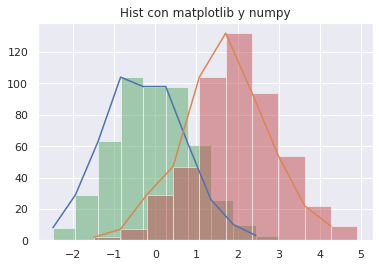

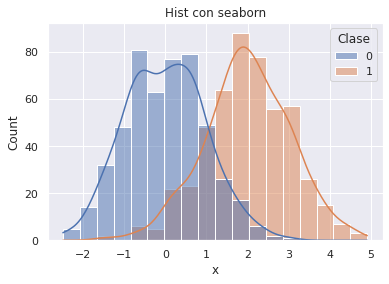

In [ ]:
#@title Generación de daset sintético de dos clases

N = 1000; # Cantidad de datos
PamA = [0, 1] # media y desvio estandar
PamB = [2, 1] # media y desvio estandar
datasetA,datasetB = dataset_newage(PamA,PamB,N)
dataset = pd.concat([datasetA,datasetB], ignore_index=True)

# Graficando histogramas
# old school
_,ax = plt.subplots(1,1)
countA,xA = np.histogram(datasetA['x']);
countB,xB = np.histogram(datasetB['x']);
ax.plot(xA[0:len(xA)-1],countA);
ax.plot(xB[0:len(xB)-1],countB);

plt.hist(datasetA['x'],alpha=0.5)
plt.hist(datasetB['x'],alpha=0.5)
ax.set_title('Hist con matplotlib y numpy')

# new school
_,ax1 = plt.subplots(1,1)
sns.histplot(data=dataset, x='x', hue='Clase', alpha = .5, kde=True, ax=ax1)
ax1.set_title('Hist con seaborn')


<ipython-input-1-98d11e39e557>:60: RuntimeWarning: invalid value encountered in long_scalars
  Precision = TP/PP;


Text(0.5, 1.0, 'TPR vs FPR')

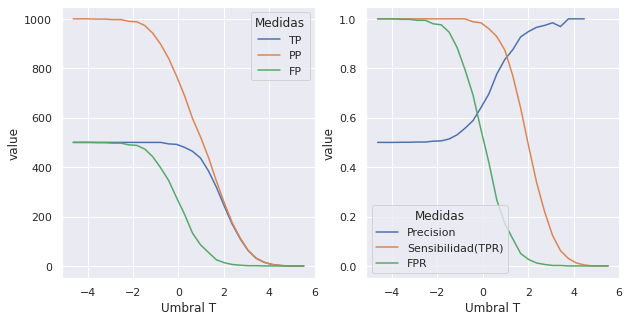

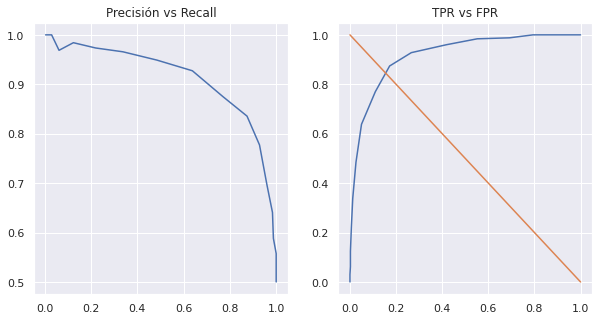

In [ ]:
#@title Cálculo de curva ROC (Clasificador ML)

datasetA,datasetB = dataset_newage(PamA,PamB,N)
dataset = pd.concat([datasetA,datasetB], ignore_index=True)

# vectores de valores del umbral T a evaluar
T_vec = np.linspace(dataset['x'].min()-1, dataset['x'].max()+1,30)
Precision = np.zeros(T_vec.shape)
Sensibilidad = np.zeros(T_vec.shape)
TP = np.zeros(T_vec.shape)
PP = np.zeros(T_vec.shape)
FPR = np.zeros(T_vec.shape)

for i in range(T_vec.size):
    T = T_vec[i];
    Predicciones = clasificador(dataset['x'],T);

    # Cálculo de medidas de desempeño
    Precision[i],Sensibilidad[i],FPR[i],TP[i],PP[i] = medidas(dataset['Clase'],Predicciones,N); # N es  ant. total casos correctos (suma de condiciones positivas)

medidas_rel = pd.DataFrame({'Umbral T':T_vec,'Precision':Precision,'Sensibilidad(TPR)':Sensibilidad,'FPR':FPR})
medidas_abs = pd.DataFrame({'Umbral T':T_vec,'TP':TP, 'PP':PP, 'FP':PP-TP})

_,ax = plt.subplots(1,2,figsize=(10, 5))
sns.lineplot(x='Umbral T', y='value', hue='Medidas', data=pd.melt(medidas_abs, 'Umbral T',var_name='Medidas'),ax=ax[0])
sns.lineplot(x='Umbral T', y='value', hue='Medidas', data=pd.melt(medidas_rel, 'Umbral T',var_name='Medidas'),ax=ax[1])

_,ax1 = plt.subplots(1,2,figsize=(10, 5))
ax1[0].plot(Sensibilidad,Precision);
ax1[0].set_title('Precisión vs Recall')

ax1[1].plot(FPR,Sensibilidad)
ax1[1].plot([1,0],[0,1]);
ax1[1].set_title('TPR vs FPR')


In [ ]:
#print(dataset)
print(medidas_abs)
datatemp=pd.melt(medidas_abs, 'Umbral T',var_name='Medidas');
print(datatemp)

    Umbral T     TP      PP     FP
0  -4.630156  500.0  1000.0  500.0
1  -4.280121  500.0  1000.0  500.0
2  -3.930086  500.0  1000.0  500.0
3  -3.580051  500.0   999.0  499.0
4  -3.230016  500.0   999.0  499.0
5  -2.879981  500.0   997.0  497.0
6  -2.529946  500.0   997.0  497.0
7  -2.179911  500.0   990.0  490.0
8  -1.829875  500.0   988.0  488.0
9  -1.479840  500.0   973.0  473.0
10 -1.129805  500.0   942.0  442.0
11 -0.779770  500.0   897.0  397.0
12 -0.429735  494.0   840.0  346.0
13 -0.079700  492.0   768.0  276.0
14  0.270335  480.0   689.0  209.0
15  0.620370  464.0   597.0  133.0
16  0.970405  437.0   523.0   86.0
17  1.320440  385.0   440.0   55.0
18  1.670475  319.0   344.0   25.0
19  2.020510  242.0   255.0   13.0
20  2.370545  169.0   175.0    6.0
21  2.720580  110.0   113.0    3.0
22  3.070615   62.0    63.0    1.0
23  3.420650   31.0    32.0    1.0
24  3.770685   15.0    15.0    0.0
25  4.120720    6.0     6.0    0.0
26  4.470755    2.0     2.0    0.0
27  4.820790    0.0 

# Conclusión

Dado que la situación ideal sería,

* Precisión y sensibilidad de 1 y 1, o
* TPR y FPR de 1 y 0 respectivamente

Podemos decir que en la curva de TPR vs FPR, una buena elección sería quedarnos con el punto mas cercano al (0,1). Gráficamente seria la intersección de la curva azul con la curva roja.

otros(rapidas)

Tanto #reales-positivos(RP) y #reales-negativos(RN) se mantienen en el dataset. Es decir, que estaas cantidadaes cambian solamente cuando cuando el daset.

Por otro lado #predicciones-positivos(PP) y #predicciones- negativas(PN) cambian, cuando cambia el bloque o estrategia desicion.
Cabe recordar que una estrategia de desicion basada en un umbral... es el caso trivial.

<AxesSubplot:xlabel='Parámetro T', ylabel='value'>

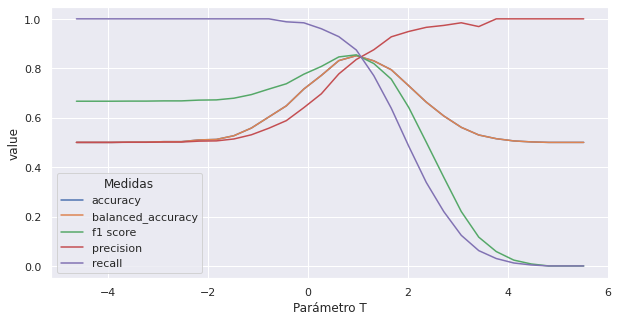

In [ ]:
#@title Pd: Mas metricas...con sklearn
def metricas(X,y,y_pred,average):
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn import metrics

  #score = knn.score(X,y)
  m_accuracy = metrics.accuracy_score(y,y_pred)
  m_balanced_accuracy = metrics.balanced_accuracy_score(y,y_pred)
  m_f1 = metrics.f1_score(y,y_pred, average=average)
  m_precision = metrics.precision_score(y,y_pred, average=average,zero_division=1)
  m_recall = metrics.recall_score(y,y_pred, average=average,zero_division=0)

  return m_accuracy,m_balanced_accuracy,m_f1,m_precision,m_recall

# --------------------------------------------------------
sp = T_vec.shape # vector de umbrales
average = 'binary' #'weighted'
m_accuracy = np.zeros(sp)
m_balanced_accuracy = np.zeros(sp)
m_f1 = np.zeros(sp)
m_precision = np.zeros(sp)
m_recall = np.zeros(sp)

# Fiteo
X = dataset['x']
y = dataset['Clase']

for k in range(T_vec.size):
    T = T_vec[k];
    y_pred = clasificador(dataset['x'],T);
    m_accuracy[k],m_balanced_accuracy[k],m_f1[k],m_precision[k],m_recall[k] = metricas(X,y,y_pred,average)

df_score = pd.DataFrame({'Parámetro T':T_vec,'accuracy': m_accuracy,'balanced_accuracy': m_balanced_accuracy,
                        'f1 score':m_f1,'precision':m_precision,'recall':m_recall})

_,ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=pd.melt(df_score, 'Parámetro T',var_name='Medidas'),x='Parámetro T', y='value', hue='Medidas',ax=ax )
